In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/LoanApplications.csv')

In [2]:
df.head()

,Week,Applications
0,1,71
1,2,57
2,3,62
3,4,64
4,5,65


In [3]:
df.set_index('Week', inplace=True)

In [4]:
df.head()

,Applications
Week,
1,71
2,57
3,62
4,64
5,65


Populating the interactive namespace from numpy and matplotlib


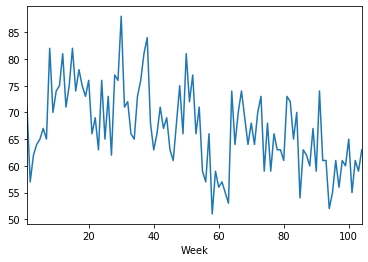

In [5]:
%pylab inline
df['Applications'].plot(kind = 'line')

In [6]:
import pandas as pd
import numpy as np
airline = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


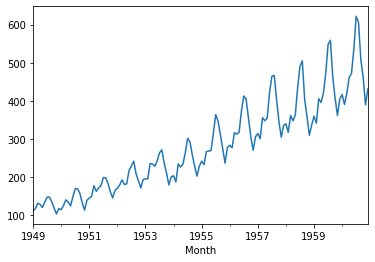

In [7]:
airline['Thousands of Passengers'].plot(kind = 'line')

In [8]:
moving_avg_6  =  airline['Thousands of Passengers'].rolling(window = 6).mean()

In [9]:
moving_avg_12 = airline['Thousands of Passengers'].rolling(12).mean()

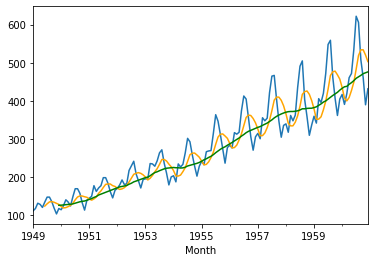

In [10]:
airline['Thousands of Passengers'].plot()
moving_avg_6.plot(color='orange')
moving_avg_12.plot(color='green')


## Seasonal Decomposition

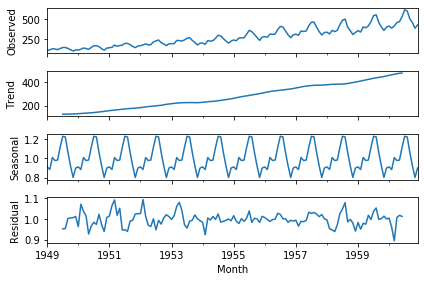

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.plot();


In [16]:
import pandas
a = pandas.Series([1,2,3,4,5,6,7,8,9,10,11,12])
a.rolling(window = 6).mean()


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     3.5
6     4.5
7     5.5
8     6.5
9     7.5
10    8.5
11    9.5
dtype: float64

In [17]:
(1 + 2 + 3 +4 + 5 + 6) / 6

3.5

In [18]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()


In [20]:
?airline['Thousands of Passengers'].ewm

In [21]:
airline['EWMA12'].head()

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
Name: EWMA12, dtype: float64

In [22]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()


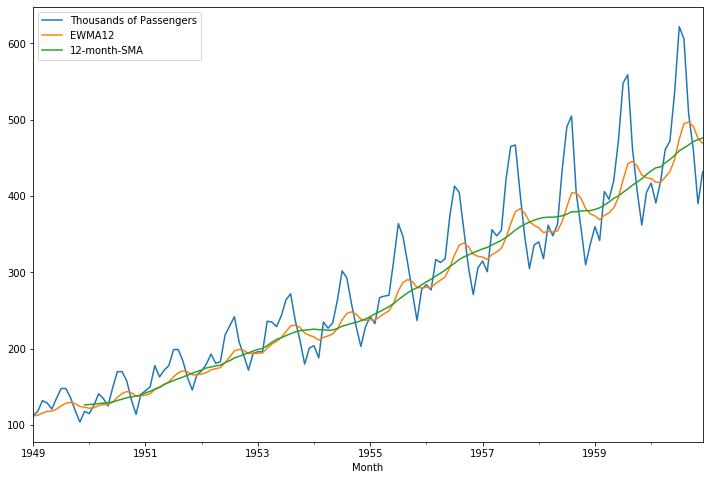

In [23]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)


### Holt-Winters 方法

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index
df.index.freq = 'MS'
df.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [25]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


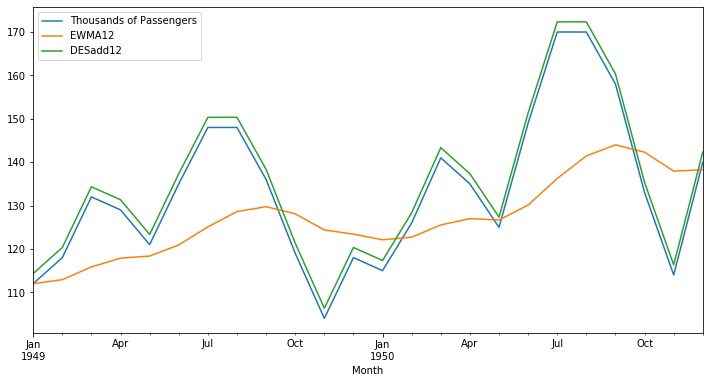

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)



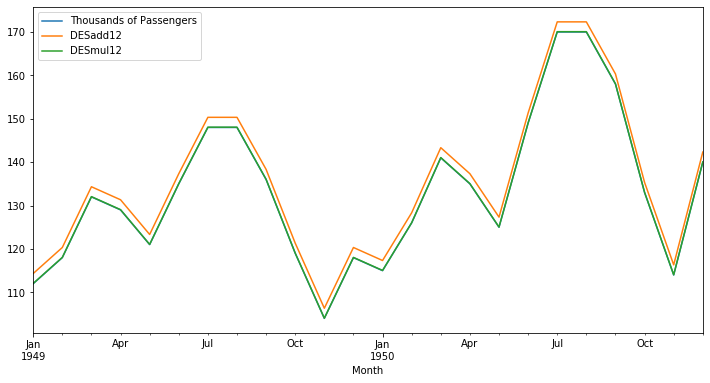

In [28]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


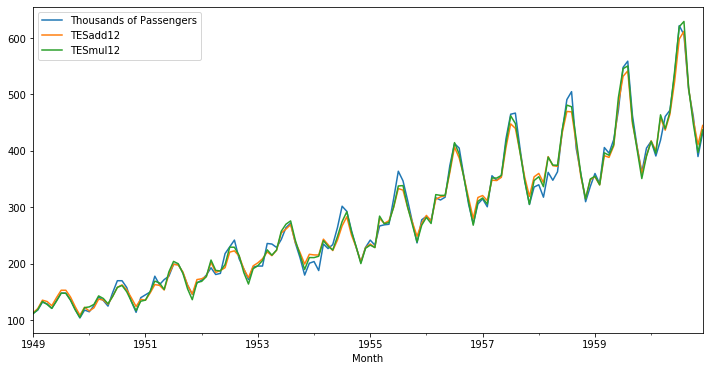

In [29]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)
